# Preliminary analysis of supermarket data

In [289]:
import pandas as pd
import numpy as np

from datetime import timedelta

from matplotlib import pyplot as plt

import seaborn as sns

In [4]:
data = pd.read_csv('supermarket_data/monday.csv', sep = ';')

In [26]:
data.head(20)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
5,2019-09-02 07:04:00,6,spices
6,2019-09-02 07:04:00,7,spices
7,2019-09-02 07:04:00,8,fruit
8,2019-09-02 07:05:00,1,checkout
9,2019-09-02 07:05:00,5,checkout


In [29]:
data.groupby(['customer_no', 'timestamp']).head(10)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [16]:
data['customer_no'].unique()

array([   1,    2,    3, ..., 1445, 1446, 1447])

## Total number of customers in each section

In [243]:
# reset index so timestamp is index.

dat2 = data.copy()
dat2.index = pd.DatetimeIndex(dat2['timestamp'])

In [244]:
dat2.head()

,timestamp,customer_no,location,hour
timestamp,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,7
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,7
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,7
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,7
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,7


In [254]:
dat2 = dat2.drop(['timestamp'], axis = 1)

In [255]:
locations = np.array(dat2.groupby('location')['customer_no'].unique())

In [256]:
type(locations)

numpy.ndarray

In [257]:
locations.shape

(5,)

In [258]:
num_customers = [np.count_nonzero(arr) for arr in locations]

In [259]:
num_customers2 = dat2.groupby('location').nunique()
num_customers2

,customer_no,location,hour
location,,,
checkout,1437,1,15
dairy,720,1,15
drinks,661,1,15
fruit,827,1,15
spices,584,1,15


## Number of customers in each section over time

Grouping over hours.

In [260]:
data['hour'] = pd.to_datetime(data['timestamp']).dt.hour

In [261]:
num_cust_time = data.groupby(['location', 'hour']).nunique()
num_cust_time

timestamp  customer_no  location  hour
location hour                                        
checkout 7            50           92         1     1
         8            52          112         1     1
         9            43           85         1     1
         10           46           90         1     1
         11           36           55         1     1
...                  ...          ...       ...   ...
spices   17           31           39         1     1
         18           41           61         1     1
         19           38           50         1     1
         20           35           39         1     1
         21           15           18         1     1

[75 rows x 4 columns]

### check if there is a location recorded for every customer at every time

In [302]:
cust_7 = data[data.customer_no == 7]
cust_7

,timestamp,customer_no,location,hour
6,2019-09-02 07:04:00,7,spices,7
11,2019-09-02 07:05:00,7,drinks,7
28,2019-09-02 07:09:00,7,spices,7
32,2019-09-02 07:11:00,7,fruit,7
40,2019-09-02 07:13:00,7,checkout,7


## fill missing values

In [269]:
customer_list = list(data['customer_no'].unique())

In [270]:
len(customer_list)

1447

In [266]:
dat2[dat2['customer_no'] == 7].resample('T').ffill()

,customer_no,location,hour
timestamp,,,
2019-09-02 07:04:00,7,spices,7
2019-09-02 07:05:00,7,drinks,7
2019-09-02 07:06:00,7,drinks,7
2019-09-02 07:07:00,7,drinks,7
2019-09-02 07:08:00,7,drinks,7
2019-09-02 07:09:00,7,spices,7
2019-09-02 07:10:00,7,spices,7
2019-09-02 07:11:00,7,fruit,7
2019-09-02 07:12:00,7,fruit,7


In [304]:
print(customer_list[6])

7


In [336]:
dat2[dat2['customer_no'] == 4]

,customer_no,location,hour
timestamp,,,
2019-09-02 07:04:00,4,dairy,7
2019-09-02 07:08:00,4,checkout,7


In [340]:
filled_data = pd.DataFrame([])

In [341]:
for customer in customer_list:
    tmp_check = dat2[dat2['customer_no'] == customer]
    tmp_check = tmp_check.reset_index()
    deltas = tmp_check['timestamp'].diff()
    gaps = deltas[deltas > timedelta(minutes=1)]
    print(f'working on customer no. {customer}')
    if deltas.sum() != 0:
        print(f'there is a gap in times')
        tmp_new = dat2[dat2['customer_no'] == customer].resample('T').ffill()
    else:
        print(f'no gap')
        tmp_new = tmp_check
    filled_data = filled_data.append(tmp_new)

working on customer no. 1
there is a gap in times
working on customer no. 2
there is a gap in times
working on customer no. 3
there is a gap in times
working on customer no. 4
there is a gap in times
working on customer no. 5
there is a gap in times
working on customer no. 6
there is a gap in times
working on customer no. 7
there is a gap in times
working on customer no. 8
there is a gap in times
working on customer no. 9
there is a gap in times
working on customer no. 10
there is a gap in times
working on customer no. 11
there is a gap in times
working on customer no. 12
there is a gap in times
working on customer no. 13
there is a gap in times
working on customer no. 14
there is a gap in times
working on customer no. 15
there is a gap in times
working on customer no. 16
there is a gap in times
working on customer no. 17
there is a gap in times
working on customer no. 18
there is a gap in times
working on customer no. 19
there is a gap in times
working on customer no. 20
there is a ga

working on customer no. 182
there is a gap in times
working on customer no. 183
there is a gap in times
working on customer no. 184
there is a gap in times
working on customer no. 185
there is a gap in times
working on customer no. 186
there is a gap in times
working on customer no. 187
there is a gap in times
working on customer no. 188
there is a gap in times
working on customer no. 189
there is a gap in times
working on customer no. 190
there is a gap in times
working on customer no. 191
there is a gap in times
working on customer no. 192
there is a gap in times
working on customer no. 193
there is a gap in times
working on customer no. 194
there is a gap in times
working on customer no. 195
there is a gap in times
working on customer no. 196
there is a gap in times
working on customer no. 197
there is a gap in times
working on customer no. 198
there is a gap in times
working on customer no. 199
there is a gap in times
working on customer no. 200
there is a gap in times
working on c

working on customer no. 358
there is a gap in times
working on customer no. 359
there is a gap in times
working on customer no. 360
there is a gap in times
working on customer no. 361
there is a gap in times
working on customer no. 362
there is a gap in times
working on customer no. 363
there is a gap in times
working on customer no. 364
there is a gap in times
working on customer no. 365
there is a gap in times
working on customer no. 366
there is a gap in times
working on customer no. 367
there is a gap in times
working on customer no. 368
there is a gap in times
working on customer no. 369
there is a gap in times
working on customer no. 370
there is a gap in times
working on customer no. 371
there is a gap in times
working on customer no. 372
there is a gap in times
working on customer no. 373
there is a gap in times
working on customer no. 374
there is a gap in times
working on customer no. 375
there is a gap in times
working on customer no. 376
there is a gap in times
working on c

there is a gap in times
working on customer no. 520
there is a gap in times
working on customer no. 521
there is a gap in times
working on customer no. 522
there is a gap in times
working on customer no. 523
there is a gap in times
working on customer no. 524
there is a gap in times
working on customer no. 525
there is a gap in times
working on customer no. 526
there is a gap in times
working on customer no. 527
there is a gap in times
working on customer no. 528
there is a gap in times
working on customer no. 529
there is a gap in times
working on customer no. 530
there is a gap in times
working on customer no. 531
there is a gap in times
working on customer no. 532
there is a gap in times
working on customer no. 533
there is a gap in times
working on customer no. 534
there is a gap in times
working on customer no. 535
there is a gap in times
working on customer no. 536
there is a gap in times
working on customer no. 537
there is a gap in times
working on customer no. 538
there is a g

working on customer no. 687
there is a gap in times
working on customer no. 688
there is a gap in times
working on customer no. 689
there is a gap in times
working on customer no. 690
there is a gap in times
working on customer no. 691
there is a gap in times
working on customer no. 692
there is a gap in times
working on customer no. 693
there is a gap in times
working on customer no. 694
there is a gap in times
working on customer no. 695
there is a gap in times
working on customer no. 696
there is a gap in times
working on customer no. 697
there is a gap in times
working on customer no. 698
there is a gap in times
working on customer no. 699
there is a gap in times
working on customer no. 700
there is a gap in times
working on customer no. 701
there is a gap in times
working on customer no. 702
there is a gap in times
working on customer no. 703
there is a gap in times
working on customer no. 704
there is a gap in times
working on customer no. 705
there is a gap in times
working on c

working on customer no. 862
there is a gap in times
working on customer no. 863
there is a gap in times
working on customer no. 864
there is a gap in times
working on customer no. 865
there is a gap in times
working on customer no. 866
there is a gap in times
working on customer no. 867
there is a gap in times
working on customer no. 868
there is a gap in times
working on customer no. 869
there is a gap in times
working on customer no. 870
there is a gap in times
working on customer no. 871
there is a gap in times
working on customer no. 872
there is a gap in times
working on customer no. 873
there is a gap in times
working on customer no. 874
there is a gap in times
working on customer no. 875
there is a gap in times
working on customer no. 876
there is a gap in times
working on customer no. 877
there is a gap in times
working on customer no. 878
there is a gap in times
working on customer no. 879
there is a gap in times
working on customer no. 880
there is a gap in times
working on c

working on customer no. 1043
there is a gap in times
working on customer no. 1044
there is a gap in times
working on customer no. 1045
there is a gap in times
working on customer no. 1046
there is a gap in times
working on customer no. 1047
there is a gap in times
working on customer no. 1048
there is a gap in times
working on customer no. 1049
there is a gap in times
working on customer no. 1050
there is a gap in times
working on customer no. 1051
there is a gap in times
working on customer no. 1052
there is a gap in times
working on customer no. 1053
there is a gap in times
working on customer no. 1054
there is a gap in times
working on customer no. 1055
there is a gap in times
working on customer no. 1056
there is a gap in times
working on customer no. 1057
there is a gap in times
working on customer no. 1058
there is a gap in times
working on customer no. 1059
there is a gap in times
working on customer no. 1060
there is a gap in times
working on customer no. 1061
there is a gap in

working on customer no. 1216
there is a gap in times
working on customer no. 1217
there is a gap in times
working on customer no. 1218
there is a gap in times
working on customer no. 1219
there is a gap in times
working on customer no. 1220
there is a gap in times
working on customer no. 1221
there is a gap in times
working on customer no. 1222
there is a gap in times
working on customer no. 1223
there is a gap in times
working on customer no. 1224
there is a gap in times
working on customer no. 1225
there is a gap in times
working on customer no. 1226
there is a gap in times
working on customer no. 1227
there is a gap in times
working on customer no. 1228
there is a gap in times
working on customer no. 1229
there is a gap in times
working on customer no. 1230
there is a gap in times
working on customer no. 1231
there is a gap in times
working on customer no. 1232
there is a gap in times
working on customer no. 1233
there is a gap in times
working on customer no. 1234
there is a gap in

working on customer no. 1393
there is a gap in times
working on customer no. 1394
there is a gap in times
working on customer no. 1395
there is a gap in times
working on customer no. 1396
there is a gap in times
working on customer no. 1397
there is a gap in times
working on customer no. 1398
there is a gap in times
working on customer no. 1399
there is a gap in times
working on customer no. 1400
there is a gap in times
working on customer no. 1401
there is a gap in times
working on customer no. 1402
there is a gap in times
working on customer no. 1403
there is a gap in times
working on customer no. 1404
there is a gap in times
working on customer no. 1405
there is a gap in times
working on customer no. 1406
there is a gap in times
working on customer no. 1407
there is a gap in times
working on customer no. 1408
there is a gap in times
working on customer no. 1409
there is a gap in times
working on customer no. 1410
there is a gap in times
working on customer no. 1411
there is a gap in

In [343]:
len(filled_data['customer_no'].unique())

1447

## Display no. customers at checkout over time

Note: this doesn't yet take into account the customers who were rushed through checkout and whose time there wasn't recorded

In [175]:
checkout = data[data.location == 'checkout']

In [176]:
checkout.head()

,timestamp,customer_no,location,hour
8,2019-09-02 07:05:00,1,checkout,7
9,2019-09-02 07:05:00,5,checkout,7
12,2019-09-02 07:06:00,2,checkout,7
13,2019-09-02 07:06:00,3,checkout,7
20,2019-09-02 07:07:00,8,checkout,7


In [179]:
checkout2 = checkout.groupby('hour').nunique()
checkout2

,timestamp,customer_no,location,hour
hour,,,,
7,50,92,1,1
8,52,112,1,1
9,43,85,1,1
10,46,90,1,1
11,36,55,1,1
12,44,73,1,1
13,54,120,1,1
14,46,90,1,1
15,47,94,1,1


In [180]:
checkout_final = checkout2.drop(['timestamp', 'location', 'hour'], axis = 1)

In [181]:
checkout_final.head()

,customer_no
hour,
7,92
8,112
9,85
10,90
11,55


In [193]:
checkout_final = checkout_final.reset_index()

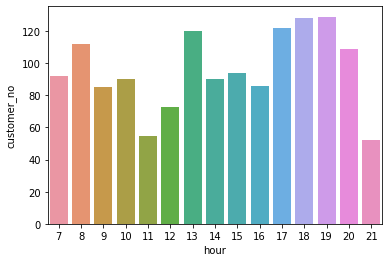

In [201]:
sns.barplot(checkout_final['hour'], checkout_final['customer_no'])

## Calculate how much time each customer spent in the supermarket

- For each customer, find max and min timestamp; subtract

In [202]:
max_times = data.groupby(['customer_no'])['timestamp'].max()

In [203]:
max_times

customer_no
1       2019-09-02 07:05:00
2       2019-09-02 07:06:00
3       2019-09-02 07:06:00
4       2019-09-02 07:08:00
5       2019-09-02 07:05:00
               ...         
1443    2019-09-02 21:48:00
1444    2019-09-02 21:49:00
1445    2019-09-02 21:49:00
1446    2019-09-02 21:50:00
1447    2019-09-02 21:50:00
Name: timestamp, Length: 1447, dtype: object

In [210]:
# double check that this captures all data points from a single customer
checking_cust_2 = data[data.customer_no == 2]

In [211]:
checking_cust_2

,timestamp,customer_no,location,hour
1,2019-09-02 07:03:00,2,dairy,7
12,2019-09-02 07:06:00,2,checkout,7


In [212]:
min_times = data.groupby(['customer_no'])['timestamp'].min()

In [216]:
times = pd.concat([max_times, min_times], axis = 1)

In [218]:
times.columns = ['max_time', 'min_time']

In [219]:
times.head()

,max_time,min_time
customer_no,,
1,2019-09-02 07:05:00,2019-09-02 07:03:00
2,2019-09-02 07:06:00,2019-09-02 07:03:00
3,2019-09-02 07:06:00,2019-09-02 07:04:00
4,2019-09-02 07:08:00,2019-09-02 07:04:00
5,2019-09-02 07:05:00,2019-09-02 07:04:00


In [224]:
times = times.apply(pd.to_datetime, axis = 1)

In [225]:
times['time_spent'] = times['max_time'] - times['min_time']

In [226]:
times.head()

,max_time,min_time,time_spent
customer_no,,,
1,2019-09-02 07:05:00,2019-09-02 07:03:00,00:02:00
2,2019-09-02 07:06:00,2019-09-02 07:03:00,00:03:00
3,2019-09-02 07:06:00,2019-09-02 07:04:00,00:02:00
4,2019-09-02 07:08:00,2019-09-02 07:04:00,00:04:00
5,2019-09-02 07:05:00,2019-09-02 07:04:00,00:01:00
